# Introduction

A whole host of kernels have been written on the quintessential Iris dataset covering all sorts of topics under the sun. They include implementing different Machine learning models to Exploratory data analysis as well as dimensionality transformation techniques. 

This notebook however will take a somewhat different approach. I will focus solely on one aspect of the dataset, visualising the decision boundary. A decision boundary in a nutshell, is a surface that separates data points belonging to different class lables. Although apparently simple at first glance, there is quite a lot of useful information to be gleaned from visualising a decision boundary, information that will give you an intuitive grasp of learning models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_checkerboard
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'plotly'

# 1. Decision Boundary of Two Classes

1. Before we start on the Iris dataset, as a starter I would like to generate some custom data points so we can have a feel for how the decision boundaries would look like on a two-class dataset (since the Iris set is a three-class set). To do this, we can call Sklearn's very convenient internal datasets by invoking -   **sklearn.datasets** to create datasets in the shapes of circles (make_circles()), crescents (make_moon( ) ) and blobs (make_blobs( ) ) as follows:

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

datasets = [make_moons(noise=0.3, random_state=0)
            ,make_circles(noise=0.2, factor=0.5, random_state=1)
            ,make_blobs()
           ]

### Tree-based Decision Boundaries

Let us first take a look at tree-based decision boundaries, specifically for these three models : the basic Decision tree, the Random Forest and the Extra Trees classifier. 

In [3]:
names = ["Decision Tree","Random Forest", "ExtraTrees"]
# Creating a Python List with our three Tree classifiers
treeclassifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ExtraTreesClassifier()]

**Plotting the Decision Surface**

The best site to obtain Python code for plotting decision surfaces can be found on the Sklearn website. There are multiple excellent examples on the site and here are some links that you may find useful:

 1. [Classifier Comparison][1] 

 2. [Plot the Decision Boundaries of a Voting Classifier][2]

  [1]: http://scikit-learn.org/0.15/auto_examples/plot_classifier_comparison.html
  [2]: http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

When plotting a decision surface, the general layout of the Python code is as follows:

 - Define an area with which to plot our decision surface and boundaries. We will use a very handy Numpy method **meshgrid** for this task
 - Extract either the class probabilities by invoking the attribute "predict_proba" or the distances between boundaries via the attribute "decision_function"

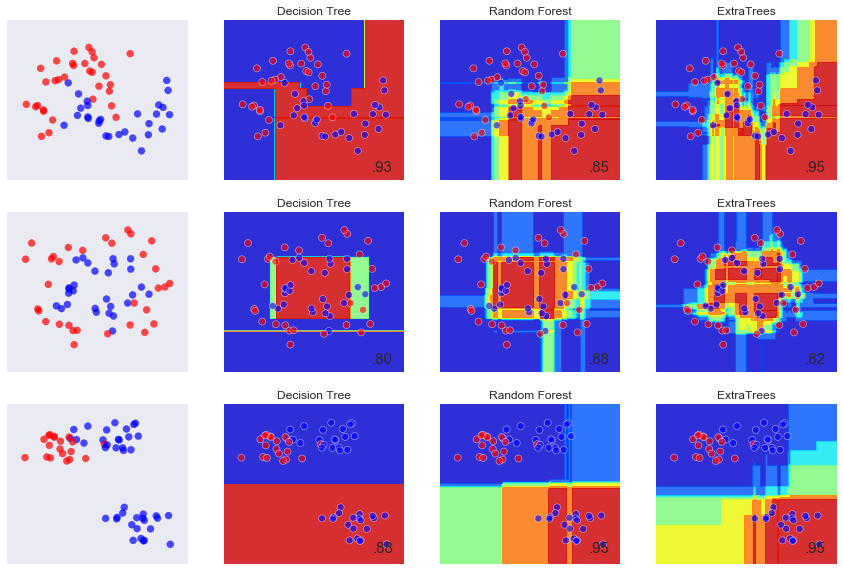

In [4]:
figure = plt.figure(figsize=(12, 10))
h = 0.02
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.jet
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(treeclassifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, treeclassifiers):
        ax = plt.subplot(len(datasets), len(treeclassifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
        # and testing points
        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   #alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

**Takeaway from the Plots**

As we can see, our tree-based models are able to capture non-linear boundaries as evinced by the jagged edges and kinks in the decision boundaries to take into account the moon and circle shapes of the custom data-points. Furthermore, we can see that these tree-based models have been able to segregate the data points sufficiently based on a visual inspection of the Decision boundaries where there is clear demarcation between the red and the blue points. 

### Linear Decision Boundaries

Let us now plot some decision boundaries of linear models namely a Linear Support Vector Machine, a logistic regression and a Naive Bayes model and we observe how their decision boundaries differ from the tree-based models.

In [5]:
linearclassifiers = [
    SVC(kernel="linear", C=0.025),
    LogisticRegression(),
    GaussianNB()]

In [6]:
datasets = [make_moons(noise=0.3, random_state=0)
            ,make_circles(noise=0.2, factor=0.5, random_state=1) 
            ,make_circles(noise=0.01, factor=0.5, random_state=1) 
           ]

**Takeaway from the plots**

Unlike the tree-based models where the decision boundaries managed to capture and reflect the fact that the dataset consisted of two classes, these linear models seem to struggle with these tasks. We can clearly see that the decision surfaces incorporate multiple shades of color which are not accurately containing either the red or blue class. In fact the decision surfaces seem to be grouping both red and blue data points together. 

# 2. Decision Boundaries of the Iris Dataset - Three Classes

Having plotted the decision boundaries of a two-class dataset, we can now proceed onto reading in the main Iris dataset. For this, instead of using Matplotlib methods, I will aim to use the interactive visualisation library Plotly to generate the decision surfaces. 

In [7]:
iris = pd.read_csv('input/Iris.csv')
iris.head(3)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa

For the benefit of those not too familiar with the Iris dataset, there are three distinct Iris species which was alluded to in the introduction. The three are given as 1) Setosa 2) Versicolor and 3) Virginica.

Since our Species column which contains these three class labels contain categorical data, the first thing to do would be to encode them numerically as follows:

In [8]:
target_map = {'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2 }
# Use the pandas apply method to numerically encode our attrition target variable
iris['Species'] = iris['Species'].apply(lambda x: target_map[x])

## Interactive Plotly visualisations

### 2.1 Overfitting effects on the Decision Boundary

In the following section, we will use the interactive capabilities of Plotly to visualise the effects of overfitting ones model and how the decision boundary changes due to this. We will plot two Random Forest classifiers, the first being one with reasonable parameters (max_depth = 4) while the second is clearly overfitting (max_depth = 50). 

Invoking the Plotly code is very similar to that of Matplotlib when generating the decision surface. We will need a Numpy meshgrid to form the basis of our surface plots as well as the **.predict** method from the learning model which to populate our surface with data.

In [10]:
del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.
               
y = iris.Species
h = .02  # step size in the mesh

X = StandardScaler().fit_transform(X)


# Train two Random Forests. One with normal reasonable parameters and the other with overfitting
trees = RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0)
trees.fit(X, y)

trees_overfit = RandomForestClassifier(max_depth=50, n_estimators=5, random_state=0)
trees_overfit.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Z = trees.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

fig = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=("Random Forest (Depth = 4)",
                                          "Random Forest (Depth = 50)")
                         )

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=False)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
                  
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# transform grid using ExtraTreesClassifier
# y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = trees_overfit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)
    fig['layout'][y].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



*PLEASE CLICK AND DRAG THE ABOVE. THESE PLOTS ARE INTERACTIVE. DOUBLE-CLICK IF YOU WANT TO GET BACK TO THE ORIGINAL VIEW.*

**Takeaway from the Plots**

The decision boundaries are very telling in portraying the effects of over-fitting the model. For example in the chart on the left where we have implemented a Random Forest with a reasonable tree depth of 4,  the three distinct Iris classes are suitably sub-divided by the decision boundaries. On the other hand the chart on the right shows a Random Forest but trained very deeply with a tree depth of 50. We see that the decision boundary is now more complicated and is trying to accommodate and fit for every possible data point. 

### 2.2 Regularization effects on the Decision Boundary

The next area that we will investigate with our decision boundary plots will be on the effects of a regularization parameter and how they affect the class boundaries. We will implement a handful of Logistic Regression models that have exactly the same parameters except where we vary the regularization parameter **C**.

In [14]:
del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)

# Implement 3 Logistic Regression models with varying values of C
clf = LogisticRegression(C=0.01)
clf.fit(X, y)

clf2 = LogisticRegression(C=1)
clf2.fit(X, y)

clf3 = LogisticRegression(C=100)
clf3.fit(X, y)

# Define our usual decision surface bounding plots
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Following on from this we plot our Plotly charts in the same vein as follows:

In [15]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=True)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=0.01)',
    hovermode= 'closest',
    showlegend= False)
    
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)       
py.iplot(fig)


Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=1)',
    hovermode= 'closest',
    showlegend= False)

data = [trace3, trace4]
fig2 = go.Figure(data=data,layout= layout)   

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)
    fig['layout'][y].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)

py.iplot(fig2)

del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)

Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


trace5 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace6 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression (C=100)',
    hovermode= 'closest',
    showlegend= False)

data = [trace5, trace6]
fig3 = go.Figure(data=data,layout= layout)   

py.iplot(fig3)

*PLEASE CLICK AND DRAG THE ABOVE. THESE PLOTS ARE INTERACTIVE. DOUBLE-CLICK IF YOU WANT TO GET BACK TO THE ORIGINAL VIEW.*

**Takeaway from the Plots**

The decision boundaries do vary quite drastically for different values of the regularization parameter C. For a very small C ( the first plot), this refers to a regime in which the Logistic Regression model is highly regularized. The second plot is that of a regime where a reasonable value for C has been used and this is reflected in the decison boundaries where the data points seem to quite accurately divided up by the boundaries.

### 2.3 Probabilities via Decision surfaces

So far sub-sections 2.1 and 2.2 have been been about visualising the actual data point separations between the three iris classes (or what the model thinks they are ). However, what if we want to visualise the probability of a data point being in either of the three classes?

Handily enough for us, we can plot the class probabilities via Sklearn. Instead of invoking **.predict** in our plots, we use the **.predict_proba** attribute instead. The thing to note when calling the latter instead of the former is that the resulting output is now a matrix of three columns (instead of a vector). These three columns correspond to the three classes in the iris dataset. Therefore when plotting the decision surface for the class probabilities, the standard way of plotting is as follows:

In [19]:
del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)


# Train two Random Forests. One with normal reasonable parameters and the other with overfitting
clf = SVC(gamma=2, C=1, probability=True)
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,:1]
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

fig = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=("Class 1 surface probability",
                                          "Class 2 surface probability")
                         )

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Jet',
                  showscale=False)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Jet',
                                line=dict(color='black', width=1))
                    )
                  
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# transform grid using ExtraTreesClassifier
# y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1:2]
Z = Z.reshape(xx.shape)


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Jet',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Jet',
                                line=dict(color='black', width=1))
                   )
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)
    fig['layout'][y].update(showgrid=False, zeroline=False,
                                   showticklabels=False, ticks='', autorange=True)

py.iplot(fig)


del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.        
y = iris.Species
h = .02  # step size in the mesh
X = StandardScaler().fit_transform(X)


Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,2:3]
Z = Z.reshape(xx.shape)


trace5 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Jet',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Jet',
                                reversescale = 'True',
                                line=dict(color='black', width=1))
                   )

layout= go.Layout(
    autosize= True,
    title= 'Class 3 Surface Probability',
    hovermode= 'closest',
    showlegend= False)

data = [trace5, trace4]
fig3 = go.Figure(data=data,layout= layout)   


py.iplot(fig3)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


*PLEASE CLICK AND DRAG THE ABOVE. THESE PLOTS ARE INTERACTIVE. DOUBLE-CLICK IF YOU WANT TO GET BACK TO THE ORIGINAL VIEW.*